# Amount of Smart Trash Cans by Neighborhood  

## By: Amy Zhang and Gavin Fehl

##### Datasets: [Smart Trash Containers](https://data.wprdc.org/dataset/smart-trash-containers/resource/75b83ac9-8069-4cf1-bcc3-b9e6b04487d9)

#### First, load pandas, fpsnippets

In [3]:
import pandas as pd
%matplotlib inline
import fpsnippets 

In [4]:
#Load in trashcans dataset
SmartTrash= pd.read_csv("SmartTrash.csv")
SmartTrash.head(3)

,_id,container_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,neighborhood,dpw_division,council_district,ward,fire_zone,x,y
0,228688,1,74,2017-09-14T13:24:40,2022-11-24T13:17:19,1st Division,122 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.004018,40.456073
1,228689,2,74,2017-09-14T13:24:40,2022-12-31T01:54:25,1st Division,2507 Brighton Rd,Pittsburgh,Pennsylvania,15212,Marshall-Shadeland,1.0,1.0,27.0,1-9,-80.025132,40.467213
2,228690,3,74,2017-09-14T13:24:40,2022-04-14T01:59:18,1st Division,1300 Federal St,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.006872,40.456625


In [9]:
import pandas as pd
import csv
import fpsnippets
from collections import defaultdict 
  
# default dict to determine type
def def_value(): 
    return 'string'
# initialize coords from csv
d = defaultdict(def_value) 
d["x"] = 'float'
d["y"] = 'float'
d["_id"] = 'int'
d["container_id"] = 'int'

# places and assets
places = pd.read_csv("SmartTrash.csv", usecols=['_id', 'container_id', 'x', 'y'], index_col="_id", dtype=d)
trashys = pd.DataFrame(columns=('container_id', 'neighborhood',))


#for every lat and long determine neighborhood and add the information to a csv
for index, row in places.iterrows():
    # Latitude & Longitude input
    Latitude = row['y']
    Longitude = row['x']
    location = fpsnippets.geo_to_neighborhood(Latitude, Longitude)
    
    if location != None :
        # data in this row
        new_row = pd.Series(
            {"container_id": row['container_id'],
             "neighborhood": location})
        #append row's data to assets
        trashys = pd.concat([trashys, new_row.to_frame().T], ignore_index=True)
        
#assets to csv
trashys.to_csv('trashcans.csv', sep=',', index=False, encoding='utf-8')

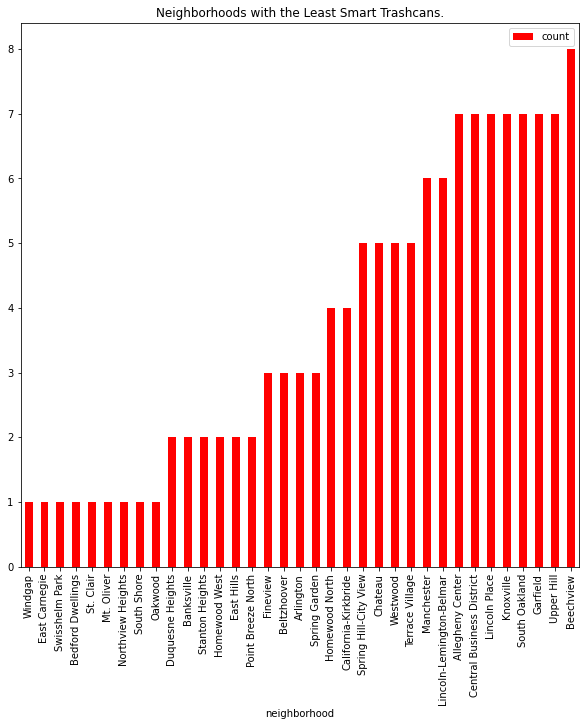

In [22]:
# places and relevant places
trashcans = pd.read_csv("trashcans.csv", usecols=['container_id', 'neighborhood'], dtype=str)

# Group by 'neighborhood' and count the number of the desired assets in each neighborhood
neighborhood_counts = trashcans.groupby('neighborhood').size().reset_index(name='restaurant_count')
neighborhood_counts.columns = ['neighborhood', 'count']
neighborhood_counts = neighborhood_counts.sort_values(by='count', ascending=True)

# Save the result to a new CSV file
neighborhood_counts.to_csv('neighborhood_top_trash_counts.csv', index=False)
ax = neighborhood_counts.head(35).plot.bar(color= "red", x='neighborhood', y='count', figsize=(10, 10,), title='Neighborhoods with the Least Smart Trashcans.')

#### So we can see that from plotting the 15:

so a huge challenge was that it kept NOT showing the neighborhoods for the latitude and longitude despite using Griffin's amaze snippets. and Gavin was like, let's search up a coordinate and see where it pops up, what if its in antarctica?? And we were like hahahhaa as if. and then we just swapped the points, and it finally works. so we actually look up the coordinates as the way they are in the dataset. and guess where it was.. ANTARCTICA. so i would say that was the most challenging part of the project. 